In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Ecommerce/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Ecommerce/test_data.csv")

In [ ]:
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
print(f"The columns in the train dataset are : {list(train_data.columns)}")

The columns in the train dataset are : ['name', 'brand', 'categories', 'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title', 'sentiment']


In [ ]:
print(f"The shape of the train dataset is {train_data.shape}")
print(f"The shape of the test dataset is {test_data.shape}")

The shape of the train dataset is (4000, 8)
The shape of the test dataset is (1000, 7)


### **Data Processing**

In [ ]:
# Checking for the Null values
train_data.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [ ]:
test_data.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
dtype: int64

* There are 10 null values in reviews.title in training and 3 null values in reviews.title in testing dataset. We can drop those rows from the datasets

In [ ]:
train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

In [ ]:
print(f"The shape of the train dataset after removing null values is {train_data.shape}")
print(f"The shape of the test dataset after removing null values is {test_data.shape}")

The shape of the train dataset after removing null values is (3990, 8)
The shape of the test dataset after removing null values is (997, 7)


In [ ]:
train_data['reviews.date'] = pd.to_datetime(train_data['reviews.date'])
train_data['reviews.date'] = pd.to_datetime(train_data['reviews.date'])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   name               3990 non-null   object             
 1   brand              3990 non-null   object             
 2   categories         3990 non-null   object             
 3   primaryCategories  3990 non-null   object             
 4   reviews.date       3990 non-null   datetime64[ns, UTC]
 5   reviews.text       3990 non-null   object             
 6   reviews.title      3990 non-null   object             
 7   sentiment          3990 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 280.5+ KB


In [ ]:
print(f"=>The unique values in name of dataset are: \n{train_data['name'].unique()}")
print(f"=>The unique values in brand of dataset are: \n{train_data['brand'].unique()}")
print(f"=>The unique values in categories of dataset are: \n{train_data['categories'].unique()}")
print(f"=>The unique values in primaryCategories are: \n{train_data['primaryCategories'].unique()}")
print(f"=>The unique values in sentiment are: \n{train_data['sentiment'].unique()}")

=>The unique values in name of dataset are: 
['All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'
 'Amazon - Echo Plus w/ Built-In Hub - Silver'
 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen'
 'Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum'
 'Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue'
 'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case'
 'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue'
 'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black'
 'Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker'
 'Amazon - Kindle Voyage - 6" - 4GB - Black'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB -

* We obeserve that there are no other brand in the dataset hence we can drop that column
* Secondly categories column is genralised to primary categories hence we can drop that column
* Name column can be genralised to categorical column that describe the product type like:
  * Kindle E-redear and other Tablets as tablets
  * TV
  * Amazon Tap and Amazon Echo as Bluetooth Speaker
  * Battery Charger
* we can also drop the reviews.title and reviews.date as that does not make any affects to model comapre to reviews.text

In [ ]:
def name_to_product_type(data):
  product_type = []
  for name in data:
    name = name.lower()
    if 'charger' in name:
      product_type.append('Charger')
    elif 'speaker' in name:
      product_type.append('Bluetooth Speaker')
    elif 'kindle' or 'e-reader' or 'tablet' in name:
      product_type.append('Tablet')
    elif 'tv' in name:
      product_type.append('TV')
    else :
      product_type.append('Other')

  return np.array(product_type)

train_data['product.type'] = name_to_product_type(train_data['name'])
test_data['product.type'] = name_to_product_type(test_data['name'])

* Now so we have categories the name column we can drop that columns

In [ ]:
train_data.drop(['name', 'brand', 'categories', 'reviews.date', 'reviews.title'], inplace = True, axis = 1)
test_data.drop(['name', 'brand', 'categories','reviews.date', 'reviews.title'], inplace = True, axis = 1)

In [ ]:
print(f"The shape of the train dataset after removing brand col is {train_data.shape}")
print(f"The shape of the test dataset after removing brand col is {test_data.shape}")

The shape of the train dataset after removing brand col is (3990, 4)
The shape of the test dataset after removing brand col is (997, 3)


### **Explorative Data Analyis**

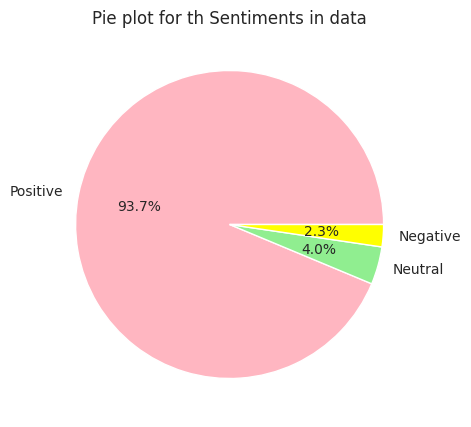

In [ ]:
# visualising the sentiments and primaryCategories
plt.figure(figsize=(5, 5))
plt.pie(train_data['sentiment'].value_counts().values,
        labels=train_data['sentiment'].value_counts().keys(),
        autopct='%1.1f%%',
        colors=['lightpink','lightgreen','yellow'])
plt.title("Pie plot for th Sentiments in data")
plt.show()

In [ ]:
sentiments_count = train_data['sentiment'].value_counts()
print(f"The value counts for the sentiments data is as: \n{sentiments_count}")

The value counts for the sentiments data is as: 
Positive    3739
Neutral      158
Negative      93
Name: sentiment, dtype: int64




*   We observe that out of 3980 data 3739 data is itself of the positive sentiment. And neutral and negative data are less 10% of the data. Hence our data is too imbalance.



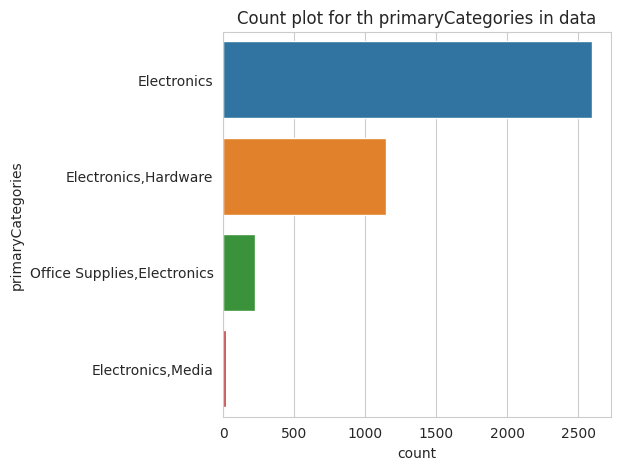

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(train_data, y = 'primaryCategories')
plt.title("Count plot for th primaryCategories in data")
plt.show()

In [ ]:
primaryCategories_count = train_data['primaryCategories'].value_counts()
print(f"The value counts for the primaryCategories data is as: \n{primaryCategories_count}")

The value counts for the primaryCategories data is as: 
Electronics                    2599
Electronics,Hardware           1150
Office Supplies,Electronics     224
Electronics,Media                17
Name: primaryCategories, dtype: int64


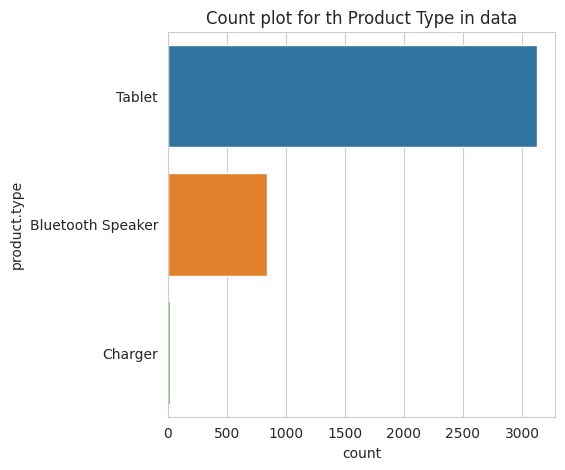

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(train_data, y = 'product.type')
plt.title("Count plot for th Product Type in data")
plt.show()

In [ ]:
productType_count = train_data['product.type'].value_counts()
print(f"The value counts for the product.type data is as: \n{productType_count}")

The value counts for the product.type data is as: 
Tablet               3126
Bluetooth Speaker     844
Charger                20
Name: product.type, dtype: int64


### **Feature Engineering**

In [ ]:
# Label Encoding the the Sentiment Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_data['primaryCategories'] = le.fit_transform(train_data['primaryCategories'])
test_data['primaryCategories'] = le.transform(test_data['primaryCategories'])
en_primaryCategories = le.classes_

train_data['sentiment'] = le.fit_transform(train_data['sentiment'])
en_sentiment = le.classes_

train_data['product.type'] = le.fit_transform(train_data['product.type'])
test_data['product.type'] = le.transform(test_data['product.type'])
en_prductType = le.classes_

print(f"the encoded classes for primaryCategories are: {dict(zip(en_primaryCategories, list(range(len(en_primaryCategories)))))}")
print(f"the encoded classes for product.type are: {dict(zip(en_prductType, list(range(len(en_prductType)))))}")
print(f"the encoded classes for sentiment are: {dict(zip(en_sentiment,  list(range(len(en_sentiment)))))}")

the encoded classes for primaryCategories are: {'Electronics': 0, 'Electronics,Hardware': 1, 'Electronics,Media': 2, 'Office Supplies,Electronics': 3}
the encoded classes for product.type are: {'Bluetooth Speaker': 0, 'Charger': 1, 'Tablet': 2}
the encoded classes for sentiment are: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [ ]:
train_data.head()

,primaryCategories,reviews.text,sentiment,product.type
0,0,Purchased on Black FridayPros - Great Price (e...,2,2
1,1,I purchased two Amazon in Echo Plus and two do...,2,2
2,1,Just an average Alexa option. Does show a few ...,1,0
3,3,"very good product. Exactly what I wanted, and ...",2,2
4,0,This is the 3rd one I've purchased. I've bough...,2,2


<Axes: xlabel='product.type', ylabel='Count'>

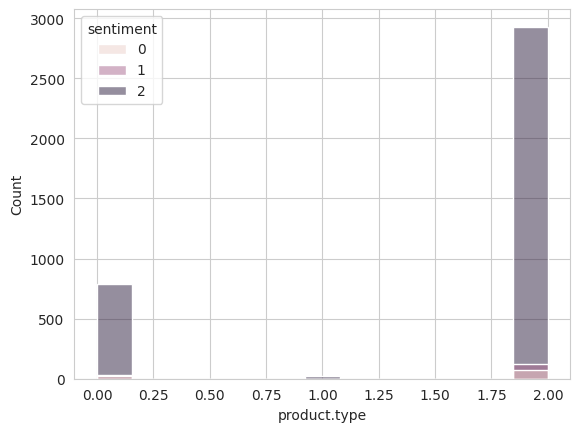

In [ ]:
# Visualize the product type with respect to sentiment

sns.histplot(data=train_data, x = 'product.type', hue = 'sentiment')
# the encoded classes for product.type are: {'Bluetooth Speaker': 0, 'Charger': 1, 'Tablet': 2}
# the encoded classes for sentiment are: {'Negative': 0, 'Neutral': 1, 'Positive': 2}

<Axes: xlabel='primaryCategories', ylabel='Count'>

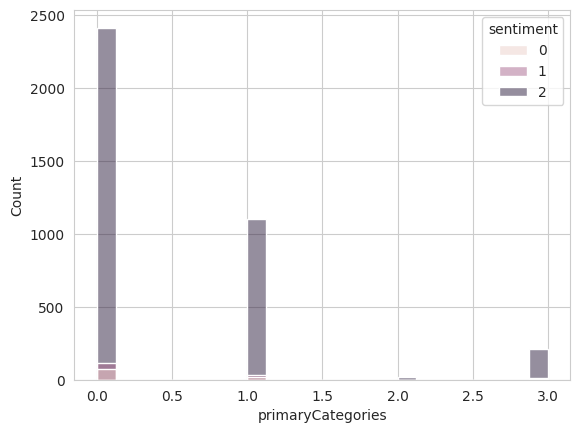

In [ ]:
# Visualize the primaryCategories with respect to sentiment

sns.histplot(data=train_data, x = 'primaryCategories', hue = 'sentiment')
# the encoded classes for primaryCategories are: {'Electronics': 0, 'Electronics,Hardware': 1, 'Electronics,Media': 2,
# 'Office Supplies,Electronics': 3}
# the encoded classes for sentiment are: {'Negative': 0, 'Neutral': 1, 'Positive': 2}

### **Data Cleaning**

In [ ]:
# Review Text Data Cleaning Process
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Define a function to perform text cleaning, tokenization, stopword removal, and normalization
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Normalize words to their root form using stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Return the cleaned and normalized text
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### TF-TDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# For train data
cleaned_text = []
for text in train_data['reviews.text']:
   cleaned_text.append(clean_text(text))
tf_idf_vectors = vectorizer.fit_transform(cleaned_text)
train_tf_idf_vectors_array = tf_idf_vectors.toarray()
print(f"The shape of Train Data TF-IDF Score array {train_tf_idf_vectors_array.shape}")

# For test data
cleaned_text = []
for text in test_data['reviews.text']:
   cleaned_text.append(clean_text(text))
tf_idf_vectors = vectorizer.transform(cleaned_text)
test_tf_idf_vectors_array = tf_idf_vectors.toarray()
print(f"The shape of Test Data TF-IDF Score array {test_tf_idf_vectors_array.shape}")

The shape of Train Data TF-IDF Score array (3990, 3928)
The shape of Test Data TF-IDF Score array (997, 3928)


#### Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Creating the tokenizer object and creating tokenxation text to sequence of reviews text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['reviews.text'])
train_tokenized_data = tokenizer.texts_to_sequences(train_data['reviews.text'])
test_tokenized_data = tokenizer.texts_to_sequences(test_data['reviews.text'])

# padding the genrated tokenised sequence
train_pad_tokenised_seq = pad_sequences(train_tokenized_data)
print(f"The shape of Train padded tokenised_seq data{train_pad_tokenised_seq.shape}")
test_pad_tokenised_seq = pad_sequences(test_tokenized_data)
print(f"The shape of Test padded tokenised_seq data{test_pad_tokenised_seq.shape}")

The shape of Train padded tokenised_seq data(3990, 1559)
The shape of Test padded tokenised_seq data(997, 1559)


In [ ]:
y = train_data['sentiment']

In [ ]:
# Train Test slipt for model training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_tf_idf_vectors_array, y, test_size = 0.2, random_state=42)

### **MultinomialNB Classifer**

In [ ]:
# Creating the MultinomialNB classifer model and training the data
from sklearn.naive_bayes import MultinomialNB
mulitnomial_classifer = MultinomialNB()
mulitnomial_classifer.fit(x_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
y_pred = mulitnomial_classifer.predict(x_test)
accuracy = accuracy_score(y_test, y_pred).round(2)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data = pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['MultinomialNB Classifier'])

model_data

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.94,0.31,0.32,0.33


* Based on MulitnomialNB classifer accurracy is good enough but the precision, f1 and recall score on consider equal weights to each label is too low.

In [ ]:
print(f"Output for the test data:\n {mulitnomial_classifer.predict(test_tf_idf_vectors_array)}")

Output for the test data:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

* This predicts all the output as Postive(2) due to imbalance data

### **RandomForest Classifer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', random_state=16)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=16)

In [ ]:
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred).round(2)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data = model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['RandomForest Classifier']))

model_data

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.94,0.31,0.32,0.33
RandomForest Classifier,0.96,0.99,0.58,0.49


In [ ]:
print(f"Output for the test data:\n {rfc.predict(test_tf_idf_vectors_array)}")

Output for the test data:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

* Based on RandomForest Classifer the accuracy is very good of the model also the f1 score for the mode has increase quite high comparatively

### **XGBoost Classifer**

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgbc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred).round(2)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data = model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['XGBoost Classifier']))

model_data

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.94,0.31,0.32,0.33
RandomForest Classifier,0.96,0.99,0.58,0.49
XGBoost Classifier,0.96,0.88,0.69,0.61


* Based on XGBoost  Classifer the accuracy is very good of the model also the f1 score for the modle has increase quite high comparatively.

In [ ]:
print(f"Output for the test data:\n {xgbc.predict(test_tf_idf_vectors_array)}")

Output for the test data:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

### **SVM**

In [ ]:
from sklearn.svm import SVC
sc = SVC(kernel='linear')
sc.fit(train_tf_idf_vectors_array, y)

SVC(kernel='linear')

In [ ]:
y_pred = sc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred).round(2)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data =  model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['SVM Classifier']))

model_data

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.94,0.31,0.32,0.33
RandomForest Classifier,0.96,0.99,0.58,0.49
XGBoost Classifier,0.96,0.88,0.69,0.61
SVM Classifier,0.96,0.99,0.68,0.59


* Based on SVM Classifer the accuracy is very good of the model also the f1 score of the model is quite similar to XGBoost.

In [ ]:
print(f"Output for the test data:\n {sc.predict(test_tf_idf_vectors_array)}")

Output for the test data:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

### **Neural Network with LSTM**

In [ ]:
from keras.utils import to_categorical
y_cat = to_categorical(y) # similar to one hot encoding method

In [ ]:
import itertools
import tensorflow as tf
tf.config.run_functions_eagerly(True) # this is for the solution of error for using decorated function while using keras.

from keras.layers import Dense, Embedding, LSTM, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

#### With Tokenized Data

In [ ]:
# with Tokenize Data
x_train, x_test, y_train, y_test = train_test_split(train_pad_tokenised_seq, y_cat, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(10000, 128, input_length=x_train.shape[1]))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Early stopping callback to stop training if validation accuracy does not improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data =  model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['LSTM NN with Tokenise Data']))

model_data

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1559, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1329603 (5.07 MB)
Trainable params: 1329603 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 431s 9s/step - loss: 0.4334 - accuracy: 0.9229 - val_loss: 0.2415 - val_accuracy: 0.9449
Epoch 2/10
50/50 [==============================] - 425s 9s/step - loss: 0.2691 - accuracy: 0.9352 - val_loss: 0.2319 - val_accuracy: 0.9449


,accuracy,precision,f1,recall
MultinomialNB Classifier,0.940000,0.31,0.32,0.33
RandomForest Classifier,0.960000,0.99,0.58,0.49
XGBoost Classifier,0.960000,0.88,0.69,0.61
SVM Classifier,0.960000,0.99,0.68,0.59
LSTM NN with Tokenise Data,0.942356,0.58,0.51,0.47


#### With TF-IDF Vectorized Data

In [ ]:
# with TF-TDF Vecotrised Data
x_train, x_test, y_train, y_test = train_test_split(train_tf_idf_vectors_array, y_cat, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(10000, 128, input_length=x_train.shape[1]))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Early stopping callback to stop training if validation accuracy does not improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data =  model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['LSTM NN with TF_IDF Vectorized Data']))

model_data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3928, 128)         1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1329603 (5.07 MB)
Trainable params: 1329603 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 1095s 22s/step - loss: 0.4083 - accuracy: 0.9352 - val_loss: 0.2495 - val_accuracy: 0.9449
Epoch 2/10
50/50 [==============================] - 1119s 22s/step - loss: 0.2849 - accuracy: 0.9352 - val_loss: 0.2494 - val_accuracy: 0

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.940000,0.31,0.32,0.33
RandomForest Classifier,0.960000,0.99,0.58,0.49
XGBoost Classifier,0.960000,0.88,0.69,0.61
SVM Classifier,0.960000,0.99,0.68,0.59
LSTM NN with Tokenise Data,0.942356,0.58,0.51,0.47
LSTM NN with TF_IDF Vectorized Data,0.944862,0.31,0.32,0.33


### **Neural Network with GRU**

#### With Tokenized Data

In [ ]:
from keras.layers import GRU
# with Tokenize Data
x_train, x_test, y_train, y_test = train_test_split(train_pad_tokenised_seq, y_cat, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(10000, 128, input_length=x_train.shape[1]))
model.add(GRU(64))
model.add(Dense(3, activation='softmax'))

# Early stopping callback to stop training if validation accuracy does not improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data =  model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['GRU NN with Tokenise Data']))

model_data

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1559, 128)         1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1317443 (5.03 MB)
Trainable params: 1317443 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 530s 11s/step - loss: 0.4970 - accuracy: 0.9185 - val_loss: 0.2320 - val_accuracy: 0.9449
Epoch 2/10
50/50 [==============================] - 552s 11s/step - loss: 0.2266 - accuracy: 0.9352 - val_loss: 0.2184 - val_accuracy: 0.9

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.940000,0.31,0.32,0.33
RandomForest Classifier,0.960000,0.99,0.58,0.49
XGBoost Classifier,0.960000,0.88,0.69,0.61
SVM Classifier,0.960000,0.99,0.68,0.59
LSTM NN with Tokenise Data,0.942356,0.58,0.51,0.47
LSTM NN with TF_IDF Vectorized Data,0.944862,0.31,0.32,0.33
GRU NN with Tokenise Data,0.923559,0.57,0.53,0.52


#### With TF-IDF Vectorized Data

In [ ]:
# With TF-IDF Vectorized Data
x_train, x_test, y_train, y_test = train_test_split(train_tf_idf_vectors_array, y_cat, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(10000, 128, input_length=x_train.shape[1]))
model.add(GRU(64))
model.add(Dense(3, activation='softmax'))

# Early stopping callback to stop training if validation accuracy does not improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro').round(2)
f1 = f1_score(y_test, y_pred, average='macro').round(2)
recall = recall_score(y_test, y_pred, average='macro').round(2)

model_data =  model_data.append(pd.DataFrame({
    'accuracy' : accuracy,
    'precision' : precision,
    'f1' : f1,
    'recall': recall
}, index = ['GRU NN with TF_IDF Vectorized Data']))

model_data

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3928, 128)         1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1317443 (5.03 MB)
Trainable params: 1317443 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 1290s 26s/step - loss: 0.4378 - accuracy: 0.9167 - val_loss: 0.2554 - val_accuracy: 0.9449
Epoch 2/10
50/50 [==============================] - 1349s 27s/step - loss: 0.2850 - accuracy: 0.9352 - val_loss: 0.2458 - val_accuracy: 0

,accuracy,precision,f1,recall
MultinomialNB Classifier,0.940000,0.31,0.32,0.33
RandomForest Classifier,0.960000,0.99,0.58,0.49
XGBoost Classifier,0.960000,0.88,0.69,0.61
SVM Classifier,0.960000,0.99,0.68,0.59
LSTM NN with Tokenise Data,0.942356,0.58,0.51,0.47
LSTM NN with TF_IDF Vectorized Data,0.944862,0.31,0.32,0.33
GRU NN with Tokenise Data,0.923559,0.57,0.53,0.52
GRU NN with TF_IDF Vectorized Data,0.944862,0.31,0.32,0.33


**Conclusion:** Based on above table we can conclude that SVM classifier has the best accuracy and f1 score is also good comparitively

### **NMF Topic Modeling**

In [ ]:
from sklearn.decomposition import NMF

# Apply NMF topic modeling
nmf = NMF(n_components=10, random_state=0)
nmf_topics = nmf.fit_transform(train_tf_idf_vectors_array)

# Analyze and label the NMF topics
nmf_topic_keywords = []
for topic in nmf.components_:
    topic_keywords = []
    for word_index, weight in enumerate(topic):
        if weight > 0.05:
            topic_keywords.append(vectorizer.get_feature_names_out()[word_index])
    nmf_topic_keywords.append(topic_keywords)

# Print the identified NMF topics
print("NMF Topics:")
for i, topic in enumerate(nmf_topic_keywords):
    print(f"Topic {i+1}: {topic}")

NMF Topics:
Topic 1: ['afford', 'amazon', 'android', 'app', 'avail', 'bad', 'basic', 'beat', 'beauti', 'beginn', 'best', 'big', 'black', 'brows', 'cant', 'charg', 'cheap', 'child', 'children', 'choic', 'color', 'complaint', 'could', 'daughter', 'decent', 'didnt', 'doesnt', 'dont', 'download', 'eas', 'email', 'everyth', 'expect', 'expens', 'far', 'fast', 'featur', 'fire', 'first', 'fit', 'friendli', 'function', 'get', 'go', 'googl', 'hd', 'inexpens', 'internet', 'ipad', 'issu', 'ive', 'laptop', 'like', 'limit', 'littl', 'load', 'look', 'lot', 'market', 'memori', 'money', 'month', 'movi', 'need', 'netflix', 'nice', 'oper', 'os', 'overal', 'perfect', 'pleas', 'power', 'price', 'prime', 'purchas', 'reason', 'run', 'screen', 'size', 'slow', 'son', 'star', 'starter', 'store', 'surf', 'tablet', 'take', 'that', 'think', 'time', 'toddler', 'use', 'user', 'valu', 'want', 'way', 'web', 'wonder', 'worth']
Topic 2: ['absolut', 'awesom', 'birthday', 'bought', 'christma', 'daughter', 'famili', 'gave'

Based on the provided word arrays, here are the topics that can be identified:

**Topic 1: Evaluating the Amazon Fire Tablet** This topic discusses the Amazon Fire Tablet, a popular tablet known for its affordability and ease of use. The words in the topic highlight the tablet's features, such as its basic operating system, good battery life, and selection of apps. Overall, the topic suggests that the Amazon Fire Tablet is a good option for those looking for a basic and affordable tablet.

**Topic 2: Gifting Amazon Fire Tablets** This topic focuses on the Amazon Fire Tablet as a gift, particularly for children and young adults. The words in the topic emphasize the tablet's portability, durability, and ability to access educational content. The topic also mentions the tablet's entertainment value, such as its ability to play games and stream videos. Overall, the topic suggests that the Amazon Fire Tablet is a thoughtful gift for children and young adults.

**Topic 3: Positive Opinions about Smart Home Devices** This topic expresses positive opinions about smart home devices, such as Amazon Echo devices. The words in the topic highlight the devices' ease of use, convenience, and ability to control various aspects of the home. The topic also mentions the devices' ability to connect to other smart devices, creating a more connected home environment. Overall, the topic suggests that smart home devices are well-liked and offer a range of benefits.

**Topic 4: Simplicity and Usability of Kindle E-readers** This topic focuses on the ease of use and simplicity of Kindle e-readers. The words in the topic emphasize the devices' portability, lightweight design, and long battery life. The topic also mentions the devices' ability to store a large number of ebooks and their comfortable reading experience. Overall, the topic suggests that Kindle e-readers are user-friendly and enjoyable for reading.

**Topic 5: Comparing Kindle and Other E-readers** This topic compares Kindle e-readers to other e-reader brands, such as Amazon Kindle Oasis and Kobo. The words in the topic highlight the strengths of Kindle e-readers, such as their affordable price, wide selection of ebooks, and ability to access Amazon's cloud services. The topic also mentions the availability of different Kindle models to suit different needs and preferences. Overall, the topic suggests that Kindle e-readers are competitive in the e-reader market.

**Topic 6: Overall Opinions about Tablets** This topic expresses overall positive opinions about tablets. The words in the topic emphasize their portability, ability to access a variety of content, and ability to be used for various purposes, such as work, entertainment, and education. The topic also mentions the convenience of tablets for browsing the web, watching videos, and playing games. Overall, the topic suggests that tablets are versatile and useful devices for modern life.

**Topic 7: Tablet Purchasing and Recommendations** This topic focuses on purchasing tablets, including the decision-making process, comparing different models, and seeking recommendations. The words in the topic mention factors to consider when purchasing a tablet, such as price, features, and brand. The topic also suggests seeking recommendations from friends, family, and online reviews to make an informed decision. Overall, the topic provides guidance for those considering purchasing a tablet.

**Topic 8: Positive Opinions about Kindle E-books** This topic expresses positive opinions about Kindle e-books, highlighting their convenience, accessibility, and affordability. The words in the topic mention the ability to store and access a vast library of ebooks, the ability to read anywhere without carrying physical books, and the competitive pricing compared to traditional paper books. Overall, the topic suggests that Kindle e-books are a convenient and affordable way to enjoy reading.

**Topic 9: Tablet Durability and Age-Appropriateness** This topic discusses the durability of tablets and their suitability for use by children of different ages. The words in the topic mention the ability of tablets to withstand drops and bumps, their long battery life, and their availability in protective cases. The topic also considers the content available on tablets, ensuring that it is appropriate for the age of the child using the device. Overall, the topic suggests that tablets can be a durable and age-appropriate option for children.

**Topic 10: Parental Control and Content Management** This topic focuses on parental control and content management features of tablets. The words in the topic mention the ability to set time limits, restrict access to certain websites and apps, and monitor the child's online activity. The topic also emphasizes the importance of discussing online safety with children and establishing open communication about their online experiences. Overall, the topic suggests that parents should carefully consider the parental control features of tablets to ensure a safe and responsible online experience for their children.

**Assumption:** Used the NMF (Non-negative Matrix Factorization) instead LDA (Latent Dirichlet Allocation) because as NMF assumes that each review is a mixture of topics and LDA assumes that each review is a mixture of these hidden topics, and each word in the review is generated from a specific topic with a certain probability. Hence NMF generate generalized topics based on all reviews for this sentiment analysis data.